In [1]:
from specim_test.specim.specfuncs import spec2d
from astropy.io import fits as pf
import numpy as np
import matplotlib.pyplot as plt
from specim.specfuncs import spec1d
import glob

In [2]:
infile = 'B0445_r0029_cleaned.fits'

In [3]:
spec = spec2d.Spec2d(infile, xtrim=[265, 385])       #, hext=12, xtrim=[30, 500])


Loading file B0445_r0029_cleaned.fits
-----------------------------------------------
Read in 2-dimensional spectrum from B0445_r0029_cleaned.fits (HDU=0)
The input dataset was trimmed
 xrange: 265:386.  yrange: 0:4096
Final data dimensions (x y): 121 x 4096

Dispersion axis:              x
N_pixels along dispersion axis: 121



In [4]:
spec.set_dispaxis('y')


Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 4096




In [ ]:
#spec.subtract_sky_2d(outfile='sky_subtracted_using_pypeit_B0445_29.fits', use_skymod=True)
#spec.szap(use_skymod=True, outfile='B0445_29_szapeed.fits')  

In [ ]:
#%matplotlib notebook
#spec.display_spec(use_skymod=True, doszap=True)

Dispersion : 0.800000
Found 401 NaNs in the two-dimensional spectrum

sky subtracted and cosmic ray rejected data has been resampled in place of the coordinateds whcih rectify the tilted wave image


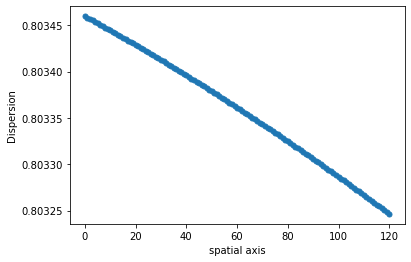

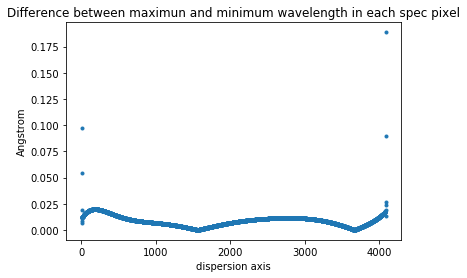

In [5]:
spec.do_waverect(doplot=True)

Profile max value (before normalization) 331.741150


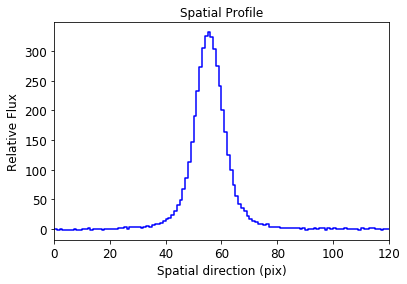

In [6]:
profile = spec.spatial_profile(pixrange=[1600, 2200])


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 1
Number of Moffat profile : 0

Now enter constants of the background polynomial upto degree 0
c0 : 1

Enter parameter values for a Gaussian profile in following format...
amplitude_value, mu_value, sigma_value

Parameters of Gaussian profile 1 : 320, 57, 5

amplitude=320.000000, mu=57.000000, sigma=5.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Polynomial1D(0, c0=2.79480963)>

    [1]: <Gaussian1D(amplitude=323.13471429, mean=56.14002916, stddev=5.06673424)>
Parameters:
           c0_0           amplitude_1           mean_1           stddev_1    
    ------------------ ------------------ ----------------- -----------------
    2.7948096348463687 323.13471429094653 56.14002915681

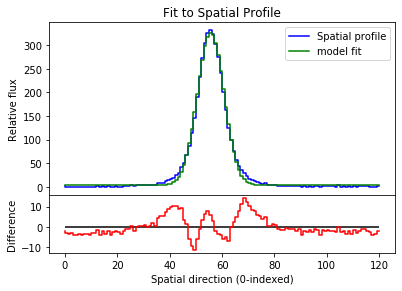

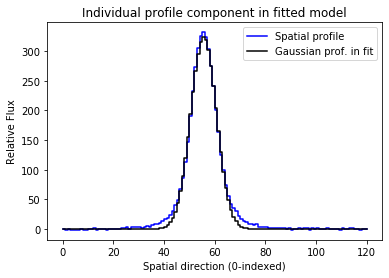

In [7]:
mod = spec.initial_model()

In [ ]:
#mod[1].stddev.bounds = (0, 8.5)

In [ ]:
#mod_new = spec.refined_model(mod)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 163 segments
  of the 2D spectrum with stepsize=25 pix ...
    Done
Fitting polynomial of degree 3 to parameter: c0_0
Fitting polynomial of degree 3 to parameter: mean_1
Fitting polynomial of degree 3 to parameter: stddev_1


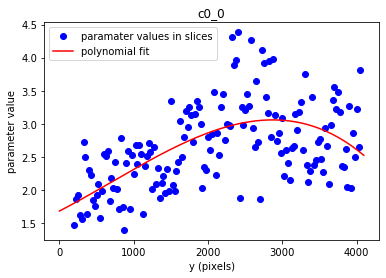

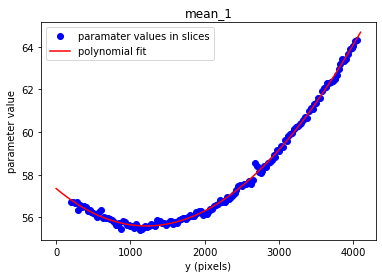

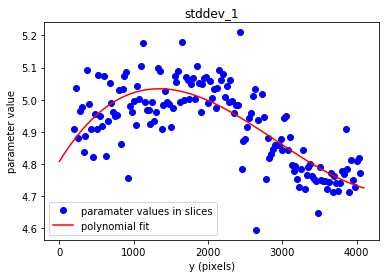

In [8]:
spec.find_and_trace(mod, stepsize=25, fitorder={'stddev_1':3, 'stddev_2':3, 'gamma_2':3, 'alpha_2':3},
                    fitrange=[200,4100])

Fitting to 1 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 0 - 4096
Fitting to the trace at 4096 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  5650.03
 Spectrum End:     8926.04
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80


Plotting the spectrum


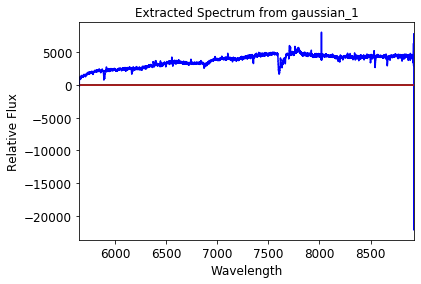

In [9]:
spec.extract(method='modelfit')

In [10]:
wav = spec.spectra[0][1]['wav']
flux = spec.spectra[0][1]['flux']

In [11]:
spec1 = spec1d.Spec1d(wav=wav[0:4050], flux=flux[0:4050])

 Spectrum Start:  5650.03
 Spectrum End:     8889.26
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80



<IPython.core.display.Javascript object>


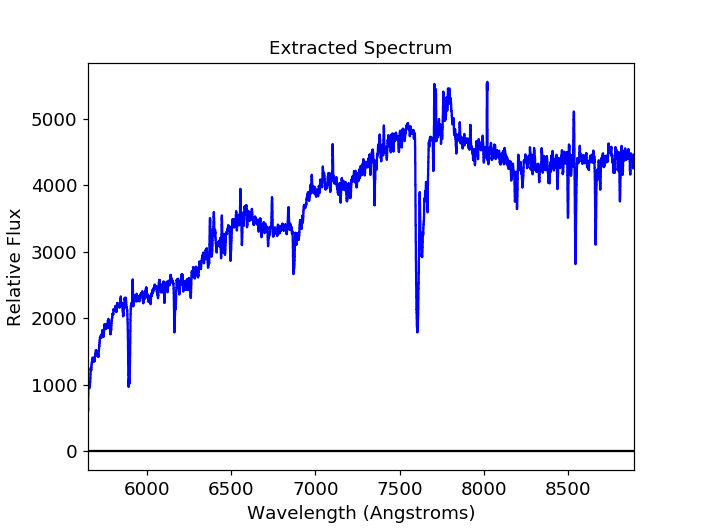

In [12]:
%matplotlib notebook
spec1.smooth(5)

In [13]:
spec.spectra[0][1].save('spec1d_B0445_r0029_bright.fits', outformat='fits')

Saved spectrum to file spec1d_B0445_r0029_bright.fits in format fits


In [14]:
sp = spec1d.Spec1d('spec1d_B0445_r0029_bright.fits', informat='fits', trimsec=[0, 4050])


Reading spectrum from spec1d_B0445_r0029_bright.fits
Expected file format: fits
 Spectrum Start:  5650.03
 Spectrum End:     8889.26
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80



In [26]:
flag = 1
for i,p in enumerate(glob.glob('*')):
    if 'spec1d' in p and 'bright' not in p:
        print(p)
        if flag :
            spec_coadd = spec1d.Spec1d(p, informat='fits', trimsec=[0, 3930])
            flag = 0 
            k = 0
        else:
            sp = spec1d.Spec1d(p, informat='fits', trimsec=[0, 3930])
            k = k+1
        if k:    
            spec_coadd = spec_coadd.__add__(sp)

spec1d_B0445_r0030.fits

Reading spectrum from spec1d_B0445_r0030.fits
Expected file format: fits
 Spectrum Start:  5651.17
 Spectrum End:     8794.39
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

spec1d_B0445_r0031.fits

Reading spectrum from spec1d_B0445_r0031.fits
Expected file format: fits
 Spectrum Start:  5651.67
 Spectrum End:     8794.89
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

 Spectrum Start:  5651.17
 Spectrum End:     8794.39
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

spec1d_B0445_r0033.fits

Reading spectrum from spec1d_B0445_r0033.fits
Expected file format: fits
 Spectrum Start:  5651.23
 Spectrum End:     8794.46
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

 Spectrum Start:  5651.17
 Spectrum End:     8794.39
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

spec1d_B0445_r0032.fits

Reading spectrum from spec1d_B0445_r0032.fits
Expected file format: fits
 Spectrum Sta

<IPython.core.display.Javascript object>


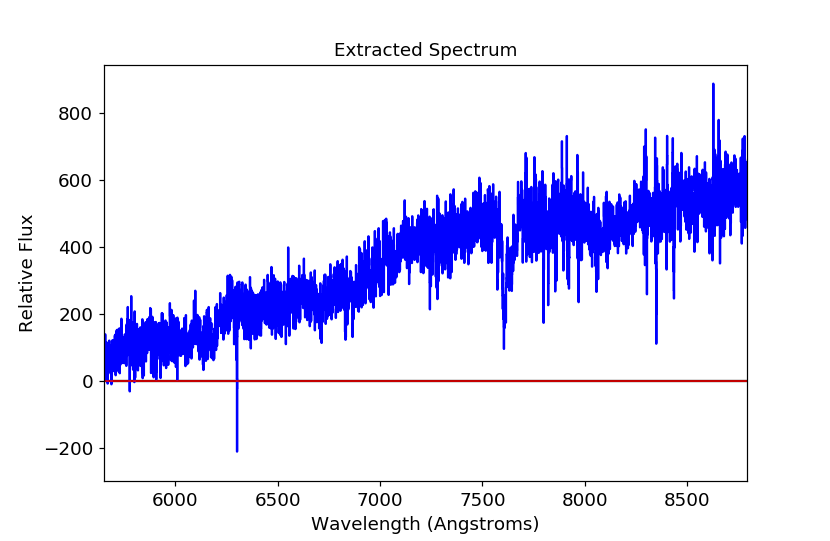

<IPython.core.display.Javascript object>


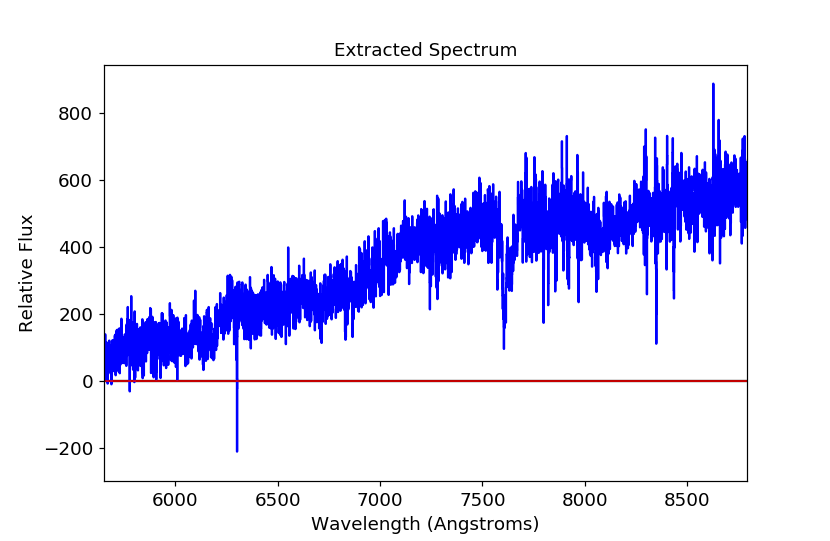

In [29]:
spec_coadd.plot()
#spec_coadd.mark_lines('abs', z=0.558, usesmooth=True)

In [17]:
flag = 1
for i,p in enumerate(glob.glob('*')):
    if 'spec1d' in p and 'bright' in p:
        print(p)
        if flag :
            spec_coadd = spec1d.Spec1d(p, informat='fits', trimsec=[0, 4050])
            flag = 0 
            k = 0
        else:
            sp = spec1d.Spec1d(p, informat='fits', trimsec=[0, 4050])
            k = k+1
        if k:    
            spec_coadd = spec_coadd.__add__(sp)

spec1d_B0445_r0029_bright.fits

Reading spectrum from spec1d_B0445_r0029_bright.fits
Expected file format: fits
 Spectrum Start:  5650.03
 Spectrum End:     8889.26
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

spec1d_B0445_r0033_bright.fits

Reading spectrum from spec1d_B0445_r0033_bright.fits
Expected file format: fits
 Spectrum Start:  5650.71
 Spectrum End:     8889.94
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

 Spectrum Start:  5650.03
 Spectrum End:     8889.26
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

spec1d_B0445_r0031_bright.fits

Reading spectrum from spec1d_B0445_r0031_bright.fits
Expected file format: fits
 Spectrum Start:  5651.15
 Spectrum End:     8890.38
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

 Spectrum Start:  5650.03
 Spectrum End:     8889.26
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

spec1d_B0445_r0030_bright.fits

Reading spectrum from spec1d_B0445_r0

<IPython.core.display.Javascript object>


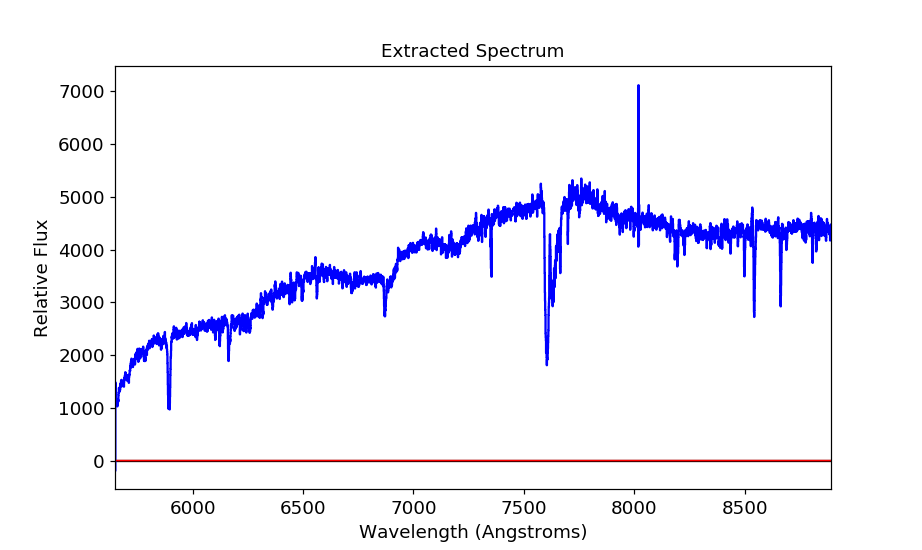

<IPython.core.display.Javascript object>


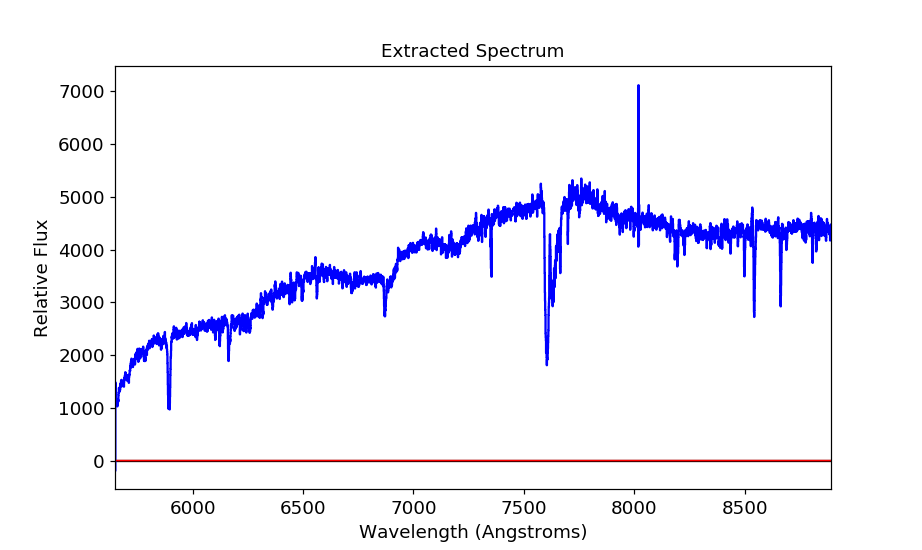

In [18]:
spec_coadd.plot()

<IPython.core.display.Javascript object>


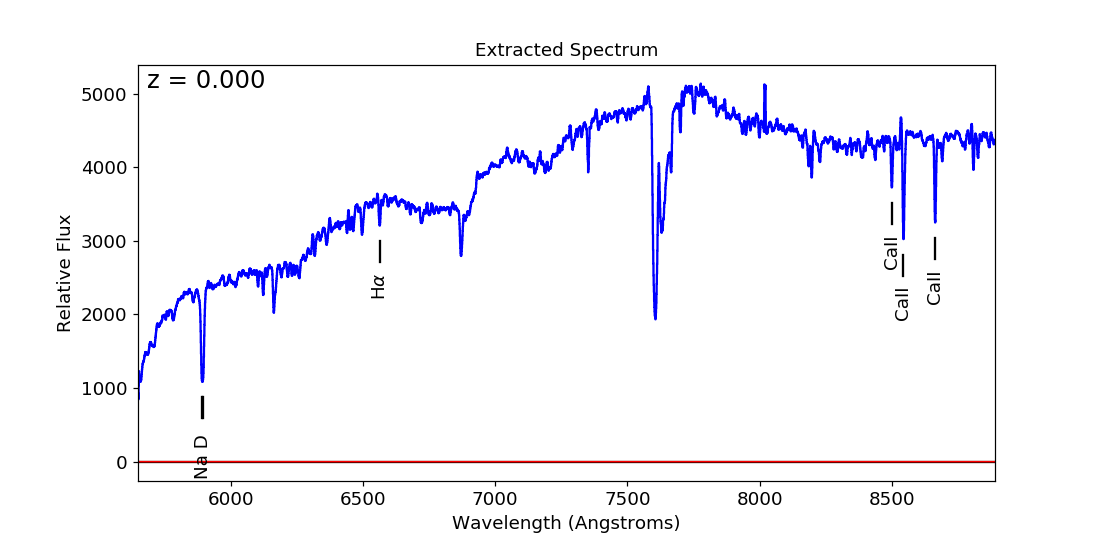


Line        lambda_rest  lambda_obs
----------  -----------  -----------
Na I (D)      5889.95       5890.24
Na I (D)      5895.92       5896.21
H-alpha       6562.80       6563.13
Ca triplet    8498.03       8498.45
Ca triplet    8542.09       8542.52
Ca triplet    8662.14       8662.57



In [23]:
spec_coadd.smooth(7)
spec_coadd.mark_lines('abs', z=0.00005, usesmooth=True)

In [ ]:
spec.spectra[0][1]['sky']

In [ ]:
for i in range(9, -1, -1):
    print(i)